<a href="https://colab.research.google.com/github/moharamfatema/heartbeat-sounds/blob/main/Heartbeat_Sounds_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Exploratory Analysis**

In [ ]:
import pandas as pd
import librosa as lr
import librosa.display
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
from sklearn.utils import resample
import seaborn as sns
from sklearn.model_selection import train_test_split
from logging import lastResort
import sklearn
from scipy.io import wavfile

In [ ]:
pip install noisereduce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import noisereduce as nr

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
acsv = 'drive/MyDrive/PR_assignment3/set_a.csv'
bcsv = 'drive/MyDrive/PR_assignment3/set_b.csv'
a_timingcsv = 'drive/MyDrive/PR_assignment3/set_a_timing.csv'

In [ ]:
setA = pd.read_csv(acsv)
setB = pd.read_csv(bcsv)
setAtiming = pd.read_csv(a_timingcsv)

Understanding the data

In [ ]:
setA.head(-1)

dataset                             fname     label  sublabel
0         a  set_a/artifact__201012172012.wav  artifact       NaN
1         a  set_a/artifact__201105040918.wav  artifact       NaN
2         a  set_a/artifact__201105041959.wav  artifact       NaN
3         a  set_a/artifact__201105051017.wav  artifact       NaN
4         a  set_a/artifact__201105060108.wav  artifact       NaN
..      ...                               ...       ...       ...
170       a          set_a/__201108222234.wav       NaN       NaN
171       a          set_a/__201108222241.wav       NaN       NaN
172       a          set_a/__201108222244.wav       NaN       NaN
173       a          set_a/__201108222247.wav       NaN       NaN
174       a          set_a/__201108222254.wav       NaN       NaN

[175 rows x 4 columns]

In [ ]:
setB.head(-1)

dataset                                              fname       label  \
0         b  set_b/Btraining_extrastole_127_1306764300147_C...  extrastole   
1         b  set_b/Btraining_extrastole_128_1306344005749_A...  extrastole   
2         b  set_b/Btraining_extrastole_130_1306347376079_D...  extrastole   
3         b  set_b/Btraining_extrastole_134_1306428161797_C...  extrastole   
4         b  set_b/Btraining_extrastole_138_1306762146980_B...  extrastole   
..      ...                                                ...         ...   
650       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
651       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
652       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
653       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
654       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   

        sublabel  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
650  noisynormal  
651  noisynormal  
652  noisynormal  
653  noisynormal  
654  noisynormal  

[655 rows x 4 columns]

In [ ]:
setAtiming.head(-1)

fname  cycle sound  location
0    set_a/normal__201102081321.wav      1    S1     10021
1    set_a/normal__201102081321.wav      1    S2     20759
2    set_a/normal__201102081321.wav      2    S1     35075
3    set_a/normal__201102081321.wav      2    S2     47244
4    set_a/normal__201102081321.wav      3    S1     62992
..                              ...    ...   ...       ...
384  set_a/normal__201108011118.wav     10    S1    272527
385  set_a/normal__201108011118.wav     10    S2    284673
386  set_a/normal__201108011118.wav     11    S1    300863
387  set_a/normal__201108011118.wav     11    S2    314279
388  set_a/normal__201108011118.wav     12    S1    330980

[389 rows x 4 columns]

In [ ]:
setA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dataset   176 non-null    object 
 1   fname     176 non-null    object 
 2   label     124 non-null    object 
 3   sublabel  0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 5.6+ KB


In [ ]:
setB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   dataset   656 non-null    object
 1   fname     656 non-null    object
 2   label     461 non-null    object
 3   sublabel  149 non-null    object
dtypes: object(4)
memory usage: 20.6+ KB


In [ ]:
setAtiming.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fname     390 non-null    object
 1   cycle     390 non-null    int64 
 2   sound     390 non-null    object
 3   location  390 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 12.3+ KB


In [ ]:
setB.describe()

dataset                                              fname   label  \
count      656                                                656     461   
unique       1                                                656       3   
top          b  set_b/Btraining_extrastole_127_1306764300147_C...  normal   
freq       656                                                  1     320   

           sublabel  
count           149  
unique            2  
top     noisynormal  
freq            120

In [ ]:
setAtiming.describe()

cycle       location
count  390.000000     390.000000
mean     5.733333  164639.984615
std      3.732807   99310.875752
min      1.000000    2583.000000
25%      3.000000   82313.000000
50%      5.000000  155624.500000
75%      8.000000  239709.750000
max     19.000000  390873.000000

In [ ]:
print(setA["label"].value_counts())

artifact    40
murmur      34
normal      31
extrahls    19
Name: label, dtype: int64


In [ ]:
print(setA["label"].value_counts().sum())

124


In [ ]:
print(setA["label"].isnull().sum())

52


In [ ]:
# check to see if they are the same amount
print(setAtiming['sound'].value_counts())

S1    195
S2    195
Name: sound, dtype: int64


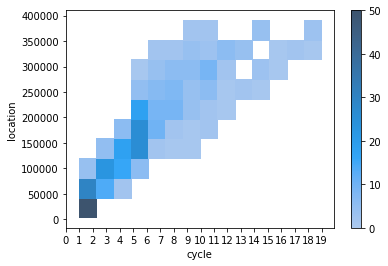

In [ ]:
g= sns.histplot(data=setAtiming, x="cycle", y="location", cbar=True)
g.set_xticks(range(20))

Editing the data

In [ ]:
# we will drop the entries with artifact as label since it is not one of the needed classifications
setA = setA[setA.label != 'artifact']

In [ ]:
# we will drop the entries with null as the label
setA = setA.dropna(subset=['label'])
setA.head(-1)

dataset                             fname     label  sublabel
40        a  set_a/extrahls__201101070953.wav  extrahls       NaN
41        a  set_a/extrahls__201101091153.wav  extrahls       NaN
42        a  set_a/extrahls__201101152255.wav  extrahls       NaN
43        a  set_a/extrahls__201101160804.wav  extrahls       NaN
44        a  set_a/extrahls__201101160808.wav  extrahls       NaN
..      ...                               ...       ...       ...
118       a    set_a/normal__201106221418.wav    normal       NaN
119       a    set_a/normal__201106221450.wav    normal       NaN
120       a    set_a/normal__201108011112.wav    normal       NaN
121       a    set_a/normal__201108011114.wav    normal       NaN
122       a    set_a/normal__201108011115.wav    normal       NaN

[83 rows x 4 columns]

In [ ]:
print(setA["label"].value_counts())
# now set A has 3 classifications

murmur      34
normal      31
extrahls    19
Name: label, dtype: int64


In [ ]:
# we will drop the entries with null as the label
setB = setB.dropna(subset=['label'])
setB.head(-1)

dataset                                              fname       label  \
0         b  set_b/Btraining_extrastole_127_1306764300147_C...  extrastole   
1         b  set_b/Btraining_extrastole_128_1306344005749_A...  extrastole   
2         b  set_b/Btraining_extrastole_130_1306347376079_D...  extrastole   
3         b  set_b/Btraining_extrastole_134_1306428161797_C...  extrastole   
4         b  set_b/Btraining_extrastole_138_1306762146980_B...  extrastole   
..      ...                                                ...         ...   
650       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
651       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
652       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
653       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   
654       b  set_b/Btraining_normal_Btraining_noisynormal_2...      normal   

        sublabel  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
650  noisynormal  
651  noisynormal  
652  noisynormal  
653  noisynormal  
654  noisynormal  

[460 rows x 4 columns]

In [ ]:
print(setB["label"].value_counts())
# set B has 3 classifications

normal        320
murmur         95
extrastole     46
Name: label, dtype: int64


In [ ]:
# will need all 4 categories together to be able to classify, so will join both sets A and B
setAB = [setA,setB]
ABdf = pd.concat(setAB)
print(ABdf.head(-1))

    dataset                                              fname     label  \
40        a                   set_a/extrahls__201101070953.wav  extrahls   
41        a                   set_a/extrahls__201101091153.wav  extrahls   
42        a                   set_a/extrahls__201101152255.wav  extrahls   
43        a                   set_a/extrahls__201101160804.wav  extrahls   
44        a                   set_a/extrahls__201101160808.wav  extrahls   
..      ...                                                ...       ...   
650       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
651       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
652       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
653       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   
654       b  set_b/Btraining_normal_Btraining_noisynormal_2...    normal   

        sublabel  
40           NaN  
41           NaN  
42           NaN  
43         

In [ ]:
print(ABdf["label"].value_counts())

normal        351
murmur        129
extrastole     46
extrahls       19
Name: label, dtype: int64


Distribution of each class

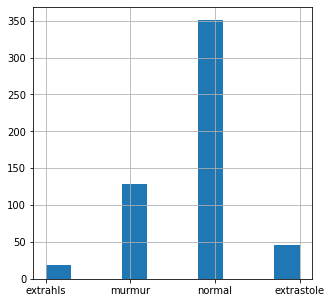

In [ ]:
ABdf['label'].hist(figsize=(5, 5))

The data is very unbalanced, so we will upsample extrahls and extrastole and downsample normal

In [ ]:
df_murmur = ABdf[ABdf.label == 'murmur']
df_extrastole = ABdf[ABdf.label == 'extrastole']
df_extrahls = ABdf[ABdf.label == 'extrahls']
df_normal = ABdf[ABdf.label == 'normal']
 
# Upsample minority classes
df_exhals_upsampled = resample(df_extrahls, replace=True, n_samples=129)    # to match murmur class
df_extrastole_upsampled = resample(df_extrastole, replace=True, n_samples=129)
# Downsample majority class
df_normal_downsampled = resample(df_normal, replace=False, n_samples=129)                               

# Combine classes
df_upsampled = pd.concat([df_murmur, df_exhals_upsampled])
df_upsampled = pd.concat([df_upsampled, df_extrastole_upsampled])
ABdf = pd.concat([df_upsampled, df_normal_downsampled])

ABdf.label.value_counts()

murmur        129
extrahls      129
extrastole    129
normal        129
Name: label, dtype: int64

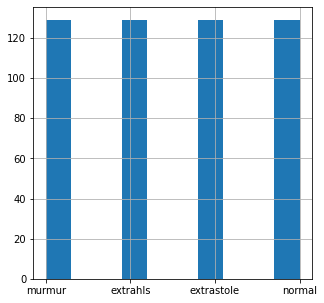

In [ ]:
ABdf['label'].hist(figsize=(5, 5))

In [ ]:
ABdf.head(-1)

dataset                                              fname   label  \
59        a                     set_a/murmur__201101051104.wav  murmur   
60        a                     set_a/murmur__201101051108.wav  murmur   
61        a                     set_a/murmur__201101051114.wav  murmur   
62        a                     set_a/murmur__201101180902.wav  murmur   
63        a                     set_a/murmur__201102051443.wav  murmur   
..      ...                                                ...     ...   
544       b  set_b/Btraining_normal_Btraining_noisynormal_1...  normal   
187       b    set_b/Btraining_normal_159_1307018640315_B1.wav  normal   
644       b  set_b/Btraining_normal_Btraining_noisynormal_2...  normal   
93        a                     set_a/normal__201101070538.wav  normal   
652       b  set_b/Btraining_normal_Btraining_noisynormal_2...  normal   

        sublabel  
59           NaN  
60           NaN  
61           NaN  
62           NaN  
63           NaN  
..           ...  
544  noisynormal  
187          NaN  
644  noisynormal  
93           NaN  
652  noisynormal  

[515 rows x 4 columns]

In [ ]:
ABdf = ABdf.reset_index()
print(ABdf.head(-1))

     index dataset                                              fname   label  \
0       59       a                     set_a/murmur__201101051104.wav  murmur   
1       60       a                     set_a/murmur__201101051108.wav  murmur   
2       61       a                     set_a/murmur__201101051114.wav  murmur   
3       62       a                     set_a/murmur__201101180902.wav  murmur   
4       63       a                     set_a/murmur__201102051443.wav  murmur   
..     ...     ...                                                ...     ...   
510    544       b  set_b/Btraining_normal_Btraining_noisynormal_1...  normal   
511    187       b    set_b/Btraining_normal_159_1307018640315_B1.wav  normal   
512    644       b  set_b/Btraining_normal_Btraining_noisynormal_2...  normal   
513     93       a                     set_a/normal__201101070538.wav  normal   
514    652       b  set_b/Btraining_normal_Btraining_noisynormal_2...  normal   

        sublabel  
0       

Looking at the audio signals of each class

In [ ]:
# making a new dataframe with just the audio and its label
audioList = []
labels = []
dir = 'drive/MyDrive/PR_assignment3/'
for j in range(516):
  if('Btraining_extrastole' in ABdf['fname'][j]):
    alteredPathName = ABdf['fname'][j].replace('Btraining_extrastole', 'extrastole_')
    #print(alteredPathName)
    audioList.append(dir + alteredPathName)
    labels.append(ABdf["label"][j])
  elif('Btraining_normal_Btraining_' in ABdf['fname'][j]):
    alteredPathName = ABdf['fname'][j].replace('Btraining_normal_Btraining_', 'normal_')
    audioList.append(dir + alteredPathName)
    labels.append(ABdf["label"][j])
  elif('Btraining_normal' in ABdf['fname'][j]):
    alteredPathName = ABdf['fname'][j].replace('Btraining_normal', 'normal_')
    audioList.append(dir + alteredPathName)
    labels.append(ABdf["label"][j])
  elif('Btraining_murmur_Btraining_' in ABdf['fname'][j]):
    alteredPathName = ABdf['fname'][j].replace('Btraining_murmur_Btraining_', 'murmur_')
    audioList.append(dir + alteredPathName)
    labels.append(ABdf["label"][j])
  elif('Btraining_murmur' in ABdf['fname'][j]):
    alteredPathName = ABdf['fname'][j].replace('Btraining_murmur', 'murmur_')
    audioList.append(dir + alteredPathName)
    labels.append(ABdf["label"][j])
  else:
    audioList.append(dir + str(ABdf["fname"][j]))
    labels.append(ABdf["label"][j])

In [ ]:
print(audioList)
print(len(audioList))
print(len(labels))

['drive/MyDrive/PR_assignment3/set_a/murmur__201101051104.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__201101051108.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__201101051114.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__201101180902.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__201102051443.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__201102052338.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__201103291548.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__201104021355.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__201104241315.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__201104291843.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__201106141148.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__201108222221.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__201108222223.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__201108222224.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__201108222226.wav', 'drive/MyDrive/PR_assignment3/set_a/murmur__2011082222

In [ ]:
audioListSeries = pd.Series(audioList,name="Audio")
labelsSeries = pd.Series(labels,name="Label")
audioDF = pd.concat([audioListSeries,labelsSeries],axis=1)

In [ ]:
audioDF['Label'].value_counts()

murmur        129
extrahls      129
extrastole    129
normal        129
Name: Label, dtype: int64

In [ ]:
audioDF.head(-1)

Audio   Label
0    drive/MyDrive/PR_assignment3/set_a/murmur__201...  murmur
1    drive/MyDrive/PR_assignment3/set_a/murmur__201...  murmur
2    drive/MyDrive/PR_assignment3/set_a/murmur__201...  murmur
3    drive/MyDrive/PR_assignment3/set_a/murmur__201...  murmur
4    drive/MyDrive/PR_assignment3/set_a/murmur__201...  murmur
..                                                 ...     ...
510  drive/MyDrive/PR_assignment3/set_b/normal_nois...  normal
511  drive/MyDrive/PR_assignment3/set_b/normal__159...  normal
512  drive/MyDrive/PR_assignment3/set_b/normal_nois...  normal
513  drive/MyDrive/PR_assignment3/set_a/normal__201...  normal
514  drive/MyDrive/PR_assignment3/set_b/normal_nois...  normal

[515 rows x 2 columns]

In [ ]:
# Making a new dataframe with reduced noise
noNoiseAudioDF = pd.concat([audioListSeries,labelsSeries],axis=1)
noNoiseAudioDF.head(-1)

Audio   Label
0    drive/MyDrive/PR_assignment3/set_a/murmur__201...  murmur
1    drive/MyDrive/PR_assignment3/set_a/murmur__201...  murmur
2    drive/MyDrive/PR_assignment3/set_a/murmur__201...  murmur
3    drive/MyDrive/PR_assignment3/set_a/murmur__201...  murmur
4    drive/MyDrive/PR_assignment3/set_a/murmur__201...  murmur
..                                                 ...     ...
510  drive/MyDrive/PR_assignment3/set_b/normal_nois...  normal
511  drive/MyDrive/PR_assignment3/set_b/normal__159...  normal
512  drive/MyDrive/PR_assignment3/set_b/normal_nois...  normal
513  drive/MyDrive/PR_assignment3/set_a/normal__201...  normal
514  drive/MyDrive/PR_assignment3/set_b/normal_nois...  normal

[515 rows x 2 columns]

In [ ]:
for i in range(516):
  if('set_a' in noNoiseAudioDF['Audio'][i]):
    noNoiseAudioDF['Audio'][i] = noNoiseAudioDF['Audio'][i].replace('set_a', 'no_noise')
  if('set_b' in noNoiseAudioDF['Audio'][i]):
    noNoiseAudioDF['Audio'][i] = noNoiseAudioDF['Audio'][i].replace('set_b', 'no_noise')


In [ ]:
noNoiseAudioDF.head(-1)

Audio   Label
0    drive/MyDrive/PR_assignment3/no_noise/murmur__...  murmur
1    drive/MyDrive/PR_assignment3/no_noise/murmur__...  murmur
2    drive/MyDrive/PR_assignment3/no_noise/murmur__...  murmur
3    drive/MyDrive/PR_assignment3/no_noise/murmur__...  murmur
4    drive/MyDrive/PR_assignment3/no_noise/murmur__...  murmur
..                                                 ...     ...
510  drive/MyDrive/PR_assignment3/no_noise/normal_n...  normal
511  drive/MyDrive/PR_assignment3/no_noise/normal__...  normal
512  drive/MyDrive/PR_assignment3/no_noise/normal_n...  normal
513  drive/MyDrive/PR_assignment3/no_noise/normal__...  normal
514  drive/MyDrive/PR_assignment3/no_noise/normal_n...  normal

[515 rows x 2 columns]

In [ ]:
'''
for i in range(516):
  newAudio, newAudiosr = lr.load(audioDF['Audio'][i])
  reducedNoise = nr.reduce_noise(y=newAudio, sr=newAudiosr)
  wavfile.write(noNoiseAudioDF['Audio'][i], newAudiosr, reducedNoise)
'''

"\nfor i in range(516):\n  newAudio, newAudiosr = lr.load(audioDF['Audio'][i])\n  reducedNoise = nr.reduce_noise(y=newAudio, sr=newAudiosr)\n  wavfile.write(noNoiseAudioDF['Audio'][i], newAudiosr, reducedNoise)\n"

In [ ]:
import os
from pathlib import Path
counter = 0
no = 0
for i in range(516):
  # Check whether the path is an existing directory
  obj = Path(noNoiseAudioDF['Audio'][i])
  #isdir = os.path.isdir(noNoiseAudioDF['Audio'][i])
  print(noNoiseAudioDF['Audio'][i])
  print(str(i) + str(obj.exists()))
  #print(str(i) + str(isdir))
  if obj.exists():
    counter+=1
  if obj.exists() == False:
    no+=1
print("final counter is " + str(counter))
print(no)

drive/MyDrive/PR_assignment3/no_noise/murmur__201101051104.wav
0True
drive/MyDrive/PR_assignment3/no_noise/murmur__201101051108.wav
1True
drive/MyDrive/PR_assignment3/no_noise/murmur__201101051114.wav
2True
drive/MyDrive/PR_assignment3/no_noise/murmur__201101180902.wav
3True
drive/MyDrive/PR_assignment3/no_noise/murmur__201102051443.wav
4True
drive/MyDrive/PR_assignment3/no_noise/murmur__201102052338.wav
5True
drive/MyDrive/PR_assignment3/no_noise/murmur__201103291548.wav
6True
drive/MyDrive/PR_assignment3/no_noise/murmur__201104021355.wav
7True
drive/MyDrive/PR_assignment3/no_noise/murmur__201104241315.wav
8True
drive/MyDrive/PR_assignment3/no_noise/murmur__201104291843.wav
9True
drive/MyDrive/PR_assignment3/no_noise/murmur__201106141148.wav
10True
drive/MyDrive/PR_assignment3/no_noise/murmur__201108222221.wav
11True
drive/MyDrive/PR_assignment3/no_noise/murmur__201108222223.wav
12True
drive/MyDrive/PR_assignment3/no_noise/murmur__201108222224.wav
13True
drive/MyDrive/PR_assignment3/n

drive/MyDrive/PR_assignment3/set_a/extrahls__201104270458.wav
129


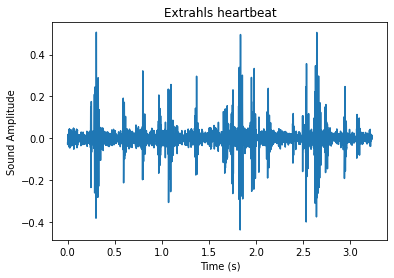

In [ ]:
i = 0
while('extrahls' not in audioDF['Audio'][i]):
  i+=1
print(audioDF['Audio'][i])
print(i)

audio, audio_sfreq = lr.load(audioDF['Audio'][i])
time = np.arange(0, len(audio)) / audio_sfreq
# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
ax.set_title('Extrahls heartbeat')
plt.show()
Audio(audio,rate=audio_sfreq)

In [ ]:
dur=lr.get_duration(audio)
print ("duration:", dur)
print(audio.shape, audio_sfreq)

duration: 3.2354195011337867
(71341,) 22050


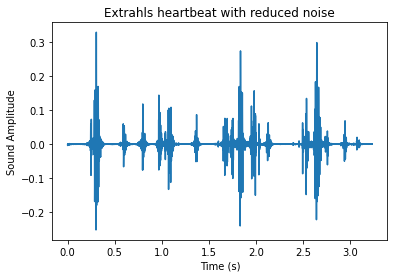

In [ ]:
# Effect of reducing the noise
noNoiseAudio, noNoisesr = lr.load(noNoiseAudioDF['Audio'][i])
time = np.arange(0, len(noNoiseAudio)) / audio_sfreq
# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, noNoiseAudio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
ax.set_title('Extrahls heartbeat with reduced noise')
plt.show()
Audio(noNoiseAudio,rate=noNoisesr)

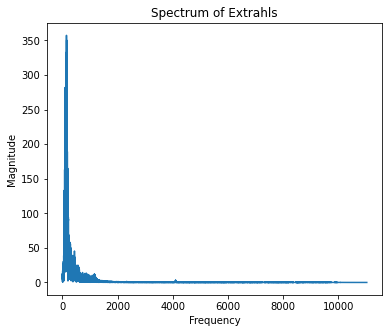

In [ ]:
# Farequency analysis
fft = np.fft.fft(audio)
mag = np.abs(fft)
freq = np.linspace(0,audio_sfreq, len(mag)) 
# take half
frequency = freq[:int(len(freq)/2)]
magnitude = mag[:int(len(freq)/2)]

plt.figure(figsize=(6,5))
plt.plot(frequency,magnitude)
plt.title("Spectrum of Extrahls")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

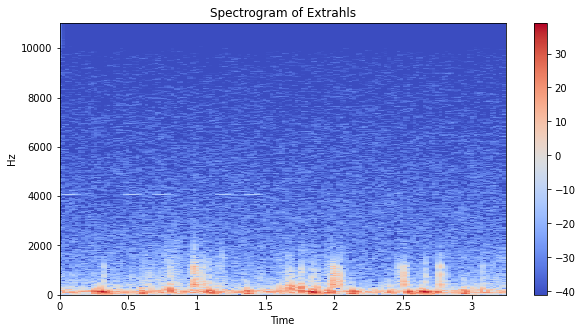

In [ ]:
# spectrogram to represent the noise or sound intensity of audio data with respect to frequency and time
X = lr.stft(audio)
Xdb = lr.amplitude_to_db(abs(X))
plt.figure(figsize = (10, 5))
lr.display.specshow(Xdb, sr = audio_sfreq, x_axis = 'time', y_axis = 'hz')
plt.title("Spectrogram of Extrahls")
plt.colorbar()

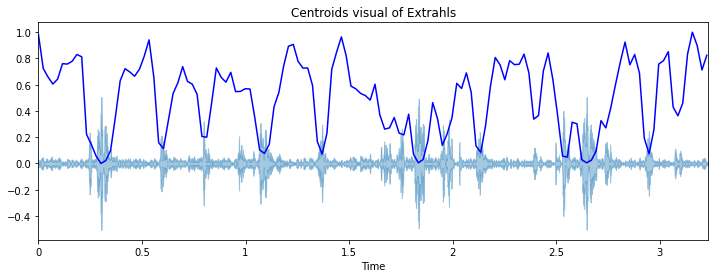

In [ ]:
# Feature Extraction from audio
# Visualize audio data focused on a particular point or mean (centroid)
spectral_centroids = lr.feature.spectral_centroid(audio, sr = audio_sfreq)[0]
# Computing the time variable
plt.figure(figsize = (12, 4))
frames = range(len(spectral_centroids))
t = lr.frames_to_time(frames)
# Normalising the spectral centroid
def normalize(x, axis = 0):
  return sklearn.preprocessing.minmax_scale(x, axis = axis)
#Plotting the Spectral Centroid along the waveform
lr.display.waveplot(audio, sr = audio_sfreq, alpha = 0.4)
plt.title("Centroids visual of Extrahls")
plt.plot(t, normalize(spectral_centroids), color = 'b')

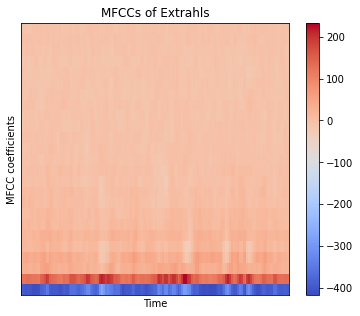

In [ ]:
# Feature Extraction from audio
sample_sound, sample_rate = lr.load(audioDF['Audio'][i])
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples
# small set of features that describe the overall shape of a spectral envelope
MFCCs = lr.feature.mfcc(sample_sound, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)
# display MFCCs
plt.figure(figsize=(6,5))
lr.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs of Extrahls")

plt.show()

drive/MyDrive/PR_assignment3/set_a/murmur__201101051114.wav


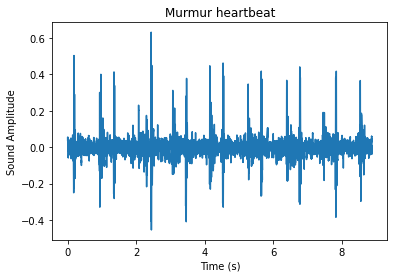

In [ ]:
i = 0
'''
while('murmur' not in audioDF['Audio'][i]):
  i+=1
print(audioDF['Audio'][i])
print(i)
'''
print(audioDF['Audio'][2])
audio, audio_sfreq = lr.load(audioDF['Audio'][2])
time = np.arange(0, len(audio)) / audio_sfreq
# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
ax.set_title('Murmur heartbeat')
plt.show()
Audio(audio,rate=audio_sfreq)
#print(audio,audio_sfreq)

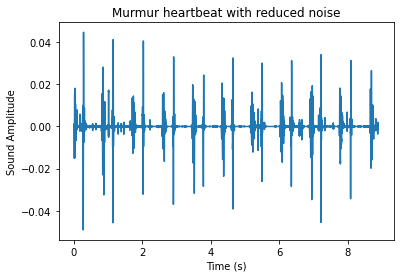

In [ ]:
# Effect of reducing the noise
noNoiseAudio, noNoisesr = lr.load(noNoiseAudioDF['Audio'][i])
time = np.arange(0, len(noNoiseAudio)) / audio_sfreq
# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, noNoiseAudio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
ax.set_title('Murmur heartbeat with reduced noise')
plt.show()
Audio(noNoiseAudio,rate=noNoisesr)

In [ ]:
dur=lr.get_duration(audio)
print ("duration:", dur)
print(audio.shape, audio_sfreq)

duration: 8.88408163265306
(195894,) 22050


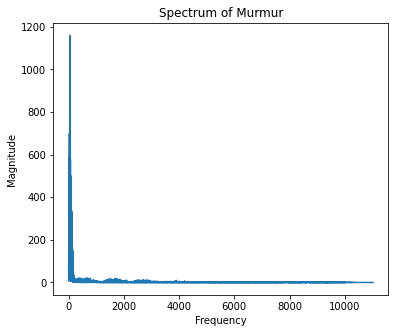

In [ ]:
# Farequency analysis
fft = np.fft.fft(audio)
mag = np.abs(fft)
freq = np.linspace(0,audio_sfreq, len(mag)) 
# take half
frequency = freq[:int(len(freq)/2)]
magnitude = mag[:int(len(freq)/2)]

plt.figure(figsize=(6,5))
plt.plot(frequency,magnitude)
plt.title("Spectrum of Murmur")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

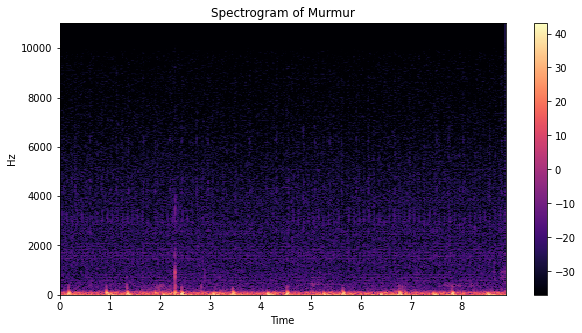

In [ ]:
# spectrogram to represent the noise or sound intensity of audio data with respect to frequency and time
X = lr.stft(audio)
Xdb = lr.amplitude_to_db(abs(X))
plt.figure(figsize = (10, 5))
lr.display.specshow(Xdb, sr = audio_sfreq, x_axis = 'time', y_axis = 'hz')
plt.title("Spectrogram of Murmur")
plt.colorbar()

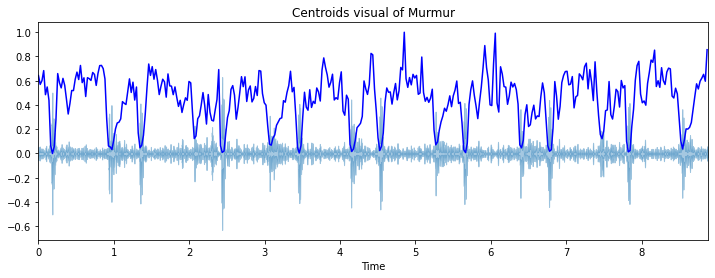

In [ ]:
# Feature Extraction from audio
# Visualize audio data focused on a particular point or mean (centroid)
spectral_centroids = lr.feature.spectral_centroid(audio, sr = audio_sfreq)[0]
# Computing the time variable
plt.figure(figsize = (12, 4))
frames = range(len(spectral_centroids))
t = lr.frames_to_time(frames)
# Normalising the spectral centroid
def normalize(x, axis = 0):
  return sklearn.preprocessing.minmax_scale(x, axis = axis)
#Plotting the Spectral Centroid along the waveform
lr.display.waveplot(audio, sr = audio_sfreq, alpha = 0.4)
plt.title("Centroids visual of Murmur")
plt.plot(t, normalize(spectral_centroids), color = 'b')

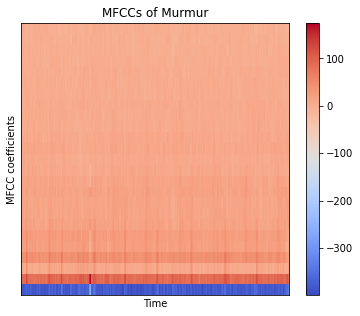

In [ ]:
# Feature Extraction from audio
sample_sound, sample_rate = lr.load(audioDF['Audio'][2])
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples
# small set of features that describe the overall shape of a spectral envelope
MFCCs = lr.feature.mfcc(sample_sound, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)
# display MFCCs
plt.figure(figsize=(6,5))
lr.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs of Murmur")

plt.show()

drive/MyDrive/PR_assignment3/set_b/normal__294_1311681084248_B.wav
387


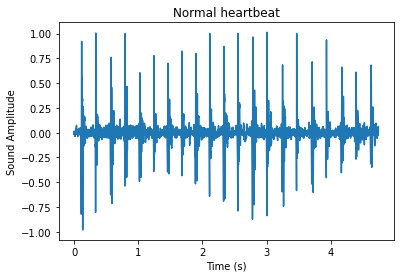

In [ ]:
i = 0
while('normal' not in audioDF['Audio'][i]):
  i+=1
print(audioDF['Audio'][i])
print(i)

audio, audio_sfreq = lr.load(audioDF['Audio'][i])
time = np.arange(0, len(audio)) / audio_sfreq
# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
ax.set_title('Normal heartbeat')
plt.show()
Audio(audio,rate=audio_sfreq)

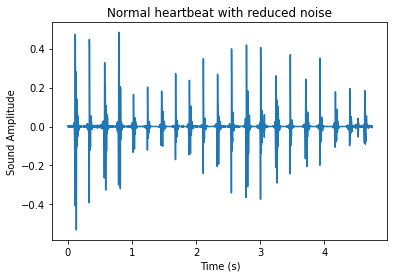

In [ ]:
# Effect of reducing the noise
noNoiseAudio, noNoisesr = lr.load(noNoiseAudioDF['Audio'][i])
time = np.arange(0, len(noNoiseAudio)) / audio_sfreq
# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, noNoiseAudio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
ax.set_title('Normal heartbeat with reduced noise')
plt.show()
Audio(noNoiseAudio,rate=noNoisesr)

In [ ]:
dur=lr.get_duration(audio)
print ("duration:", dur)
print(audio.shape, audio_sfreq)

duration: 4.742539682539682
(104573,) 22050


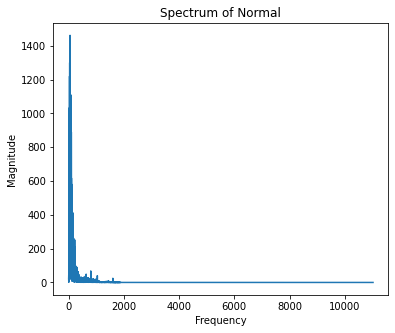

In [ ]:
# Farequency analysis
fft = np.fft.fft(audio)
mag = np.abs(fft)
freq = np.linspace(0,audio_sfreq, len(mag)) 
# take half
frequency = freq[:int(len(freq)/2)]
magnitude = mag[:int(len(freq)/2)]

plt.figure(figsize=(6,5))
plt.plot(frequency,magnitude)
plt.title("Spectrum of Normal")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

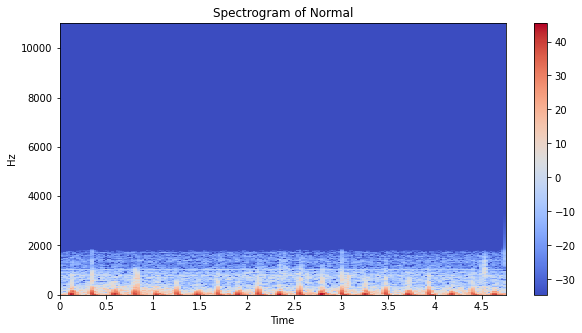

In [ ]:
# spectrogram to represent the noise or sound intensity of audio data with respect to frequency and time
X = lr.stft(audio)
Xdb = lr.amplitude_to_db(abs(X))
plt.figure(figsize = (10, 5))
lr.display.specshow(Xdb, sr = audio_sfreq, x_axis = 'time', y_axis = 'hz')
plt.title("Spectrogram of Normal")
plt.colorbar()

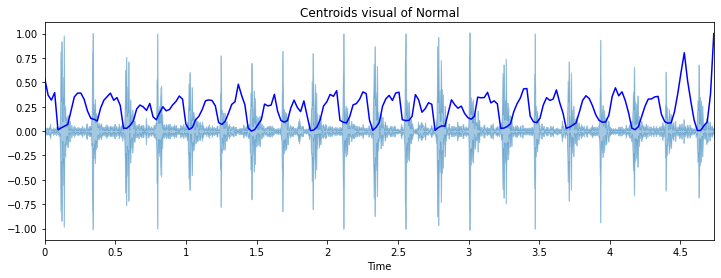

In [ ]:
# Feature Extraction from audio
# Visualize audio data focused on a particular point or mean (centroid)
spectral_centroids = lr.feature.spectral_centroid(audio, sr = audio_sfreq)[0]
# Computing the time variable
plt.figure(figsize = (12, 4))
frames = range(len(spectral_centroids))
t = lr.frames_to_time(frames)
# Normalising the spectral centroid
def normalize(x, axis = 0):
  return sklearn.preprocessing.minmax_scale(x, axis = axis)
#Plotting the Spectral Centroid along the waveform
lr.display.waveplot(audio, sr = audio_sfreq, alpha = 0.4)
plt.title("Centroids visual of Normal")
plt.plot(t, normalize(spectral_centroids), color = 'b')

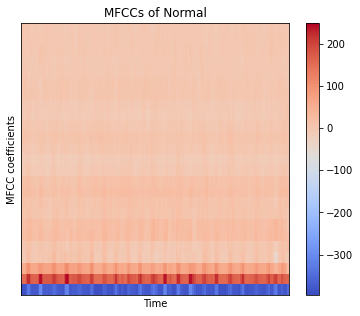

In [ ]:
# Feature Extraction from audio
sample_sound, sample_rate = lr.load(audioDF['Audio'][i])
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples
# small set of features that describe the overall shape of a spectral envelope
MFCCs = lr.feature.mfcc(sample_sound, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)
# display MFCCs
plt.figure(figsize=(6,5))
lr.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs of Normal")

plt.show()

drive/MyDrive/PR_assignment3/set_b/extrastole__179_1307990076841_C.wav
258


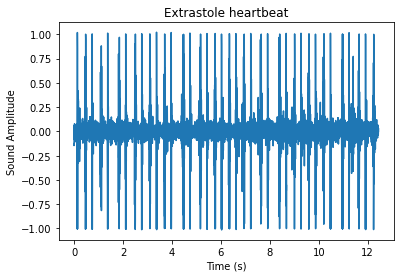

In [ ]:
i = 0
while('extrastole' not in audioDF['Audio'][i]):
  i+=1
print(audioDF['Audio'][i])
print(i)

audio, audio_sfreq = lr.load(audioDF['Audio'][i])
time = np.arange(0, len(audio)) / audio_sfreq
# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
ax.set_title('Extrastole heartbeat')
plt.show()
Audio(audio,rate=audio_sfreq)

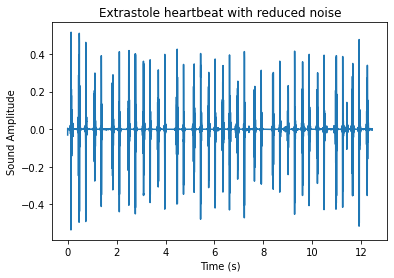

In [ ]:
# Effect of reducing the noise
noNoiseAudio, noNoisesr = lr.load(noNoiseAudioDF['Audio'][i])
time = np.arange(0, len(noNoiseAudio)) / audio_sfreq
# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, noNoiseAudio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
ax.set_title('Extrastole heartbeat with reduced noise')
plt.show()
Audio(noNoiseAudio,rate=noNoisesr)

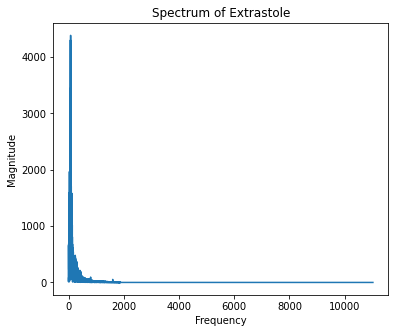

In [ ]:
# Farequency analysis
fft = np.fft.fft(audio)
mag = np.abs(fft)
freq = np.linspace(0,audio_sfreq, len(mag)) 
# take half
frequency = freq[:int(len(freq)/2)]
magnitude = mag[:int(len(freq)/2)]

plt.figure(figsize=(6,5))
plt.plot(frequency,magnitude)
plt.title("Spectrum of Extrastole")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

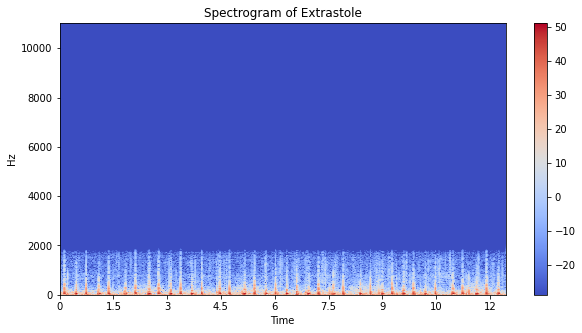

In [ ]:
# spectrogram to represent the noise or sound intensity of audio data with respect to frequency and time
X = lr.stft(audio)
Xdb = lr.amplitude_to_db(abs(X))
plt.figure(figsize = (10, 5))
lr.display.specshow(Xdb, sr = audio_sfreq, x_axis = 'time', y_axis = 'hz')
plt.title("Spectrogram of Extrastole")
plt.colorbar()

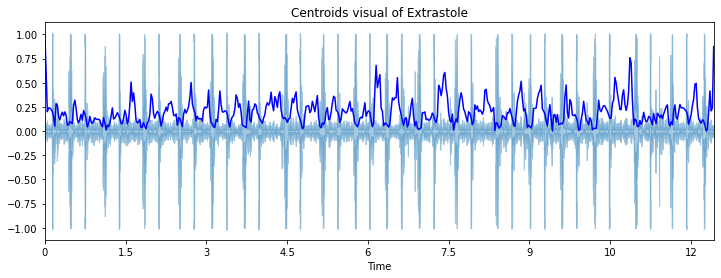

In [ ]:
# Feature Extraction from audio
# Visualize audio data focused on a particular point or mean (centroid)
spectral_centroids = lr.feature.spectral_centroid(audio, sr = audio_sfreq)[0]
# Computing the time variable
plt.figure(figsize = (12, 4))
frames = range(len(spectral_centroids))
t = lr.frames_to_time(frames)
# Normalising the spectral centroid
def normalize(x, axis = 0):
  return sklearn.preprocessing.minmax_scale(x, axis = axis)
#Plotting the Spectral Centroid along the waveform
lr.display.waveplot(audio, sr = audio_sfreq, alpha = 0.4)
plt.title("Centroids visual of Extrastole")
plt.plot(t, normalize(spectral_centroids), color = 'b')

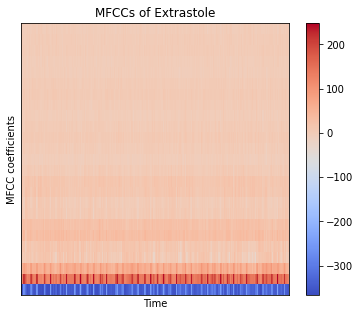

In [ ]:
# Feature Extraction from audio
sample_sound, sample_rate = lr.load(audioDF['Audio'][i])
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples
# small set of features that describe the overall shape of a spectral envelope
MFCCs = lr.feature.mfcc(sample_sound, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)
# display MFCCs
plt.figure(figsize=(6,5))
lr.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs of Extrastole")

plt.show()

# **Data Splitting**

For Task a

In [ ]:
setAtimingX = setAtiming.drop(['location'], axis=1)
print(setAtimingX)
x_traina, x_testa, y_traina, y_testa = train_test_split(setAtimingX, setAtiming['location'], train_size=0.85, shuffle=True)
x_traina, x_vala, y_traina, y_vala = train_test_split(x_traina, y_traina, test_size=0.176, shuffle=True)

                              fname  cycle sound
0    set_a/normal__201102081321.wav      1    S1
1    set_a/normal__201102081321.wav      1    S2
2    set_a/normal__201102081321.wav      2    S1
3    set_a/normal__201102081321.wav      2    S2
4    set_a/normal__201102081321.wav      3    S1
..                              ...    ...   ...
385  set_a/normal__201108011118.wav     10    S2
386  set_a/normal__201108011118.wav     11    S1
387  set_a/normal__201108011118.wav     11    S2
388  set_a/normal__201108011118.wav     12    S1
389  set_a/normal__201108011118.wav     12    S2

[390 rows x 3 columns]


In [ ]:
print("x test = " + str(x_testa.size))
print("x test shape = " + str(x_testa.shape))
print("y test = " + str(y_testa.size))
print("x train = " + str(x_traina.size))
print("x train shape = " + str(x_traina.shape))
print("y train = " + str(y_traina.size))
print("x val = " + str(x_vala.size))
print("x validation shape = " + str(x_vala.shape))
print("y val = " + str(y_vala.size))

x test = 177
x test shape = (59, 3)
y test = 59
x train = 816
x train shape = (272, 3)
y train = 272
x val = 177
x validation shape = (59, 3)
y val = 59


In [ ]:
print(x_traina)

                              fname  cycle sound
137  set_a/normal__201105011626.wav      1    S2
355  set_a/normal__201108011115.wav      4    S2
246  set_a/normal__201106111136.wav      6    S1
77   set_a/normal__201103140132.wav      6    S2
358  set_a/normal__201108011115.wav      6    S1
..                              ...    ...   ...
374  set_a/normal__201108011118.wav      5    S1
19   set_a/normal__201102081321.wav     10    S2
382  set_a/normal__201108011118.wav      9    S1
43   set_a/normal__201103090635.wav      2    S2
36   set_a/normal__201102260502.wav      7    S1

[272 rows x 3 columns]


For Task b

In [ ]:
Xb = audioDF['Audio']
Yb = audioDF['Label']

In [ ]:
XnoNoise = noNoiseAudioDF['Audio']
YnoNoise = noNoiseAudioDF['Label']

In [ ]:
print(Xb)

0      drive/MyDrive/PR_assignment3/set_a/murmur__201...
1      drive/MyDrive/PR_assignment3/set_a/murmur__201...
2      drive/MyDrive/PR_assignment3/set_a/murmur__201...
3      drive/MyDrive/PR_assignment3/set_a/murmur__201...
4      drive/MyDrive/PR_assignment3/set_a/murmur__201...
                             ...                        
511    drive/MyDrive/PR_assignment3/set_b/normal__159...
512    drive/MyDrive/PR_assignment3/set_b/normal_nois...
513    drive/MyDrive/PR_assignment3/set_a/normal__201...
514    drive/MyDrive/PR_assignment3/set_b/normal_nois...
515    drive/MyDrive/PR_assignment3/set_b/normal__177...
Name: Audio, Length: 516, dtype: object


In [ ]:
print(Yb)

0      murmur
1      murmur
2      murmur
3      murmur
4      murmur
        ...  
511    normal
512    normal
513    normal
514    normal
515    normal
Name: Label, Length: 516, dtype: object


In [ ]:
x_trainb, x_testb, y_trainb, y_testb = train_test_split(Xb, Yb, train_size=0.85, shuffle=True)
x_trainb, x_valb, y_trainb, y_valb = train_test_split(x_trainb, y_trainb, test_size=0.176, shuffle=True)

In [ ]:
print("x test = " + str(x_testb.size))
print("y test = " + str(y_testb.size))
print("x train = " + str(x_trainb.size))
print("y train = " + str(y_trainb.size))
print("x val = " + str(x_valb.size))
print("y val = " + str(y_valb.size))

x test = 78
y test = 78
x train = 360
y train = 360
x val = 78
y val = 78


In [ ]:
x_trainb_no_noise, x_testb_no_noise, y_trainb_no_noise, y_testb_no_noise = train_test_split(XnoNoise, YnoNoise, train_size=0.85, shuffle=True)
x_trainb_no_noise, x_valb_no_noise, y_trainb_no_noise, y_valb_no_noise = train_test_split(x_trainb_no_noise, y_trainb_no_noise, test_size=0.176, shuffle=True)

In [ ]:
print("x test = " + str(x_testb_no_noise.size))
print("y test = " + str(y_testb_no_noise.size))
print("x train = " + str(x_trainb_no_noise.size))
print("y train = " + str(y_trainb_no_noise.size))
print("x val = " + str(x_valb_no_noise.size))
print("y val = " + str(y_valb_no_noise.size))

x test = 78
y test = 78
x train = 360
y train = 360
x val = 78
y val = 78
